# Import Libraries

In [1]:
import folium
import numpy as np
import pandas as pd
import pathlib as pl
import seaborn as sns
from subjetividades import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder as LE

In [2]:
current_path    = pl.Path.cwd().parent
output_folders  = create_output_directories(current_path)
data_folders    = create_data_directories(output_folders[0])
docs_list       = list(data_folders[0].glob('*.xlsx'))
docs_list

[WindowsPath('d:/Repositorios/Vanessa - subjetividades/subjetividades-politicas/data/raw/2. filtrada respuestas_prediccion_completo.xlsx'),
 WindowsPath('d:/Repositorios/Vanessa - subjetividades/subjetividades-politicas/data/raw/Extremismo.xlsx'),
 WindowsPath('d:/Repositorios/Vanessa - subjetividades/subjetividades-politicas/data/raw/preguntas de la entrevista para IA.xlsx'),
 WindowsPath('d:/Repositorios/Vanessa - subjetividades/subjetividades-politicas/data/raw/respuestas_faker.xlsx'),
 WindowsPath('d:/Repositorios/Vanessa - subjetividades/subjetividades-politicas/data/raw/respuestas_prediccion_completo.xlsx'),
 WindowsPath('d:/Repositorios/Vanessa - subjetividades/subjetividades-politicas/data/raw/~$Extremismo.xlsx')]

# Import the dataset

In [3]:
df                  = pd.read_excel(docs_list[1], sheet_name='Sheet0')
full_size_df_1      = df.shape[0]           # get the number of rows in the dataframe
full_size_df_col    = df.shape[1]           # get the number of columns in the dataframe
df                  = df.drop(0, axis=0)    # delete the first row

df.head()


d:\Repositorios\Vanessa - subjetividades\subjetividades-politicas\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q78_2,Q78_3,Q78_4,Deshum_1,Deshum_2,Deshum_3,Q63,Q64,Q64_5_TEXT,Q78
1,2023-01-23 12:49:34,2023-01-23 13:11:29,IP Address,200.3.144.7,100,1314,True,2023-01-23 13:11:31.154000,R_1mIsUivDPG5uKUQ,NaN,...,NaN,NaN,NaN,74,74,100,Gustavo Petro,Gustavo Petro,NaN,NaN
2,2023-01-23 12:49:48,2023-01-23 13:11:42,IP Address,179.19.50.39,100,1314,True,2023-01-23 13:11:43.743000,R_1ApG86q8OuiAnmh,NaN,...,NaN,NaN,NaN,100,100,100,Sergio Fajardo,Sergio Fajardo,NaN,NaN
3,2023-01-23 12:49:31,2023-01-23 13:11:51,IP Address,191.106.213.33,100,1339,True,2023-01-23 13:11:52.442000,R_2yeGOP3ujdRCNoW,NaN,...,NaN,NaN,NaN,40,80,90,Gustavo Petro,Gustavo Petro,NaN,NaN
4,2023-01-23 12:49:29,2023-01-23 13:12:13,IP Address,191.95.42.229,100,1363,True,2023-01-23 13:12:14.331000,R_Z4C1CcmO4uRFfkB,NaN,...,NaN,NaN,NaN,65,65,50,Gustavo Petro,No votaría,NaN,NaN
5,2023-01-23 17:46:20,2023-01-23 18:00:18,IP Address,201.221.176.33,100,838,True,2023-01-23 18:00:19.279000,R_3Wa3NbYxLI2Do65,NaN,...,NaN,NaN,NaN,20,100,46,NaN,NaN,NaN,NaN


## Codes 

In [4]:
JenniferCali                = df[df['Sex_3_TEXT'] == 'JenniferCali(00008909547)'].index
df.loc[JenniferCali, 'Q78'] = '00008909547-JAVCALI'

codigo1                 = df[df['Q69'] == '00008909547'].index
df.loc[codigo1, 'Q78']  = '00008909547-JAVCALI'
df.loc[codigo1, 'Q69']  = 'CALI'

In [5]:
df['Duration (in seconds)'] = pd.to_numeric(df['Duration (in seconds)'], errors='coerce')
df['NormSoc_1']             = pd.to_numeric(df['NormSoc_1'], errors='coerce')
df['NormSoc_2']             = pd.to_numeric(df['NormSoc_2'], errors='coerce')
df['NormSoc_3']             = pd.to_numeric(df['NormSoc_3'], errors='coerce')
df['NormSoc_4']             = pd.to_numeric(df['NormSoc_4'], errors='coerce')
df['NormSoc_5']             = pd.to_numeric(df['NormSoc_5'], errors='coerce')
df['Deshum_1']              = pd.to_numeric(df['Deshum_1'], errors='coerce')
df['Deshum_2']              = pd.to_numeric(df['Deshum_2'], errors='coerce')
df['Deshum_3']              = pd.to_numeric(df['Deshum_3'], errors='coerce')

## Column Minutes: The amount of time in minutes the user spent on the survey

In [6]:
df['Duration in minutes'] = df['Duration (in seconds)']/60

## Column time_per_question: The amount of time in minutes the user spent on each question

In [7]:
df['minutes_per_question'] = df['Duration in minutes']/full_size_df_col
df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q78_4,Deshum_1,Deshum_2,Deshum_3,Q63,Q64,Q64_5_TEXT,Q78,Duration in minutes,minutes_per_question
1,2023-01-23 12:49:34,2023-01-23 13:11:29,IP Address,200.3.144.7,100,1314,True,2023-01-23 13:11:31.154000,R_1mIsUivDPG5uKUQ,NaN,...,NaN,74.0,74.0,100.0,Gustavo Petro,Gustavo Petro,NaN,NaN,21.900000,0.139490
2,2023-01-23 12:49:48,2023-01-23 13:11:42,IP Address,179.19.50.39,100,1314,True,2023-01-23 13:11:43.743000,R_1ApG86q8OuiAnmh,NaN,...,NaN,100.0,100.0,100.0,Sergio Fajardo,Sergio Fajardo,NaN,NaN,21.900000,0.139490
3,2023-01-23 12:49:31,2023-01-23 13:11:51,IP Address,191.106.213.33,100,1339,True,2023-01-23 13:11:52.442000,R_2yeGOP3ujdRCNoW,NaN,...,NaN,40.0,80.0,90.0,Gustavo Petro,Gustavo Petro,NaN,NaN,22.316667,0.142144
4,2023-01-23 12:49:29,2023-01-23 13:12:13,IP Address,191.95.42.229,100,1363,True,2023-01-23 13:12:14.331000,R_Z4C1CcmO4uRFfkB,NaN,...,NaN,65.0,65.0,50.0,Gustavo Petro,No votaría,NaN,NaN,22.716667,0.144692
5,2023-01-23 17:46:20,2023-01-23 18:00:18,IP Address,201.221.176.33,100,838,True,2023-01-23 18:00:19.279000,R_3Wa3NbYxLI2Do65,NaN,...,NaN,20.0,100.0,46.0,NaN,NaN,NaN,NaN,13.966667,0.088960


## 1st Filter remove the rows with False values in Finished	column

In [8]:
df['Finished']  = df['Finished'].astype(bool)
df              = df[df['Finished'] == True]
full_size_df_2  = df.shape[0]           # get the number of rows in the dataframe
df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q78_4,Deshum_1,Deshum_2,Deshum_3,Q63,Q64,Q64_5_TEXT,Q78,Duration in minutes,minutes_per_question
1,2023-01-23 12:49:34,2023-01-23 13:11:29,IP Address,200.3.144.7,100,1314,True,2023-01-23 13:11:31.154000,R_1mIsUivDPG5uKUQ,NaN,...,NaN,74.0,74.0,100.0,Gustavo Petro,Gustavo Petro,NaN,NaN,21.900000,0.139490
2,2023-01-23 12:49:48,2023-01-23 13:11:42,IP Address,179.19.50.39,100,1314,True,2023-01-23 13:11:43.743000,R_1ApG86q8OuiAnmh,NaN,...,NaN,100.0,100.0,100.0,Sergio Fajardo,Sergio Fajardo,NaN,NaN,21.900000,0.139490
3,2023-01-23 12:49:31,2023-01-23 13:11:51,IP Address,191.106.213.33,100,1339,True,2023-01-23 13:11:52.442000,R_2yeGOP3ujdRCNoW,NaN,...,NaN,40.0,80.0,90.0,Gustavo Petro,Gustavo Petro,NaN,NaN,22.316667,0.142144
4,2023-01-23 12:49:29,2023-01-23 13:12:13,IP Address,191.95.42.229,100,1363,True,2023-01-23 13:12:14.331000,R_Z4C1CcmO4uRFfkB,NaN,...,NaN,65.0,65.0,50.0,Gustavo Petro,No votaría,NaN,NaN,22.716667,0.144692
5,2023-01-23 17:46:20,2023-01-23 18:00:18,IP Address,201.221.176.33,100,838,True,2023-01-23 18:00:19.279000,R_3Wa3NbYxLI2Do65,NaN,...,NaN,20.0,100.0,46.0,NaN,NaN,NaN,NaN,13.966667,0.088960


## 2nd filter: Remove the rows with time lower than 10 minutes

In [9]:
df = df[(df['Duration in minutes'] >= 10)]

In [10]:
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')
print(f'Loss information wit the firts filter: {100*(1-df.shape[0]/full_size_df_1)}%')

Number of rows: 971
Number of columns: 159
Loss information wit the firts filter: 18.33473507148865%


In [11]:
# columns to drop
df              = df.drop(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress','Duration (in seconds)', 'Finished', 'RecordedDate','RecipientLastName','RecipientFirstName', 'RecipientEmail','ExternalReference','DistributionChannel', 'UserLanguage', 'Q66','Sex_3_TEXT','Region_3_TEXT','Control_1','Control_2',], axis=1)
# df              = df.drop(['Q64_5_TEXT', 'InterGContacPetrist_4', 'InterGContacPetrist_2', 'InterGContacPetrist_1', 'ConspiracyPetrist_4', 'ConspiracyPetrist_3', 'ConspiracyPetrist_2', 'ConspiracyPetrist_1', 'EmpUribist_3', 'EmpUribist_2', 'EmpUribist_1', 'InterGContacPetrist_5', 'InterGContacPetrist_3', 'InterGContacPetrist_6', 'Q38_1', 'Q37_1', 'IdPol_2_TEXT', 'ConspiracyUribi_4', 'ConspiracyUribi_3', 'ConspiracyUribi_2', 'ConspiracyUribi_1', 'OutGEmpUribis_1', 'OutGEmpUribis_3', 'OutGEmpUribis_2', 'InterGContacUribi_2', 'InterGContacUribi_4', 'InterGContacUribi_3', 'InterGContacUribi_1','InterGContacUribi_5', 'InterGContacUribi_6', 'InterGroup_1', 'Intragroup_1', 'OutGEmpUribis_1', 'OutGEmpUribis_2', 'OutGEmpUribis_3', 'NormSoc_4', 'NormSoc_5', 'Deshum_3', 'Deshum_2', 'NormSoc_3', 'NormSoc_1', 'NormSoc_2'], axis=1)
df.head()

,ResponseId,LocationLatitude,LocationLongitude,Sex,Age,EDuc,Etnia,Q69,Q70,Identity Fusion_1,...,Q78_4,Deshum_1,Deshum_2,Deshum_3,Q63,Q64,Q64_5_TEXT,Q78,Duration in minutes,minutes_per_question
1,R_1mIsUivDPG5uKUQ,6.2529,-75.5646,Un hombre,52,Posgrado,Ninguna,NaN,NaN,Ni de acuerdo ni en desacuerdo,...,NaN,74.0,74.0,100.0,Gustavo Petro,Gustavo Petro,NaN,NaN,21.900000,0.139490
2,R_1ApG86q8OuiAnmh,4.6913,-74.032,Un hombre,24,Universitario,Ninguna,NaN,NaN,Algo en desacuerdo,...,NaN,100.0,100.0,100.0,Sergio Fajardo,Sergio Fajardo,NaN,NaN,21.900000,0.139490
3,R_2yeGOP3ujdRCNoW,3.4129,-76.5191,Una mujer,25,Universitario,Ninguna,NaN,NaN,Ni de acuerdo ni en desacuerdo,...,NaN,40.0,80.0,90.0,Gustavo Petro,Gustavo Petro,NaN,NaN,22.316667,0.142144
4,R_Z4C1CcmO4uRFfkB,6.2529,-75.5646,Una mujer,23,Secundaria,Ninguna,NaN,NaN,De acuerdo,...,NaN,65.0,65.0,50.0,Gustavo Petro,No votaría,NaN,NaN,22.716667,0.144692
5,R_3Wa3NbYxLI2Do65,6.2529,-75.5646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,20.0,100.0,46.0,NaN,NaN,NaN,NaN,13.966667,0.088960


# Data Preprocessing

In [12]:
def temp_value_counts(df, column):
    """
    This function returns the value counts of a column in a dataframe.
    """
    return print(df[column].value_counts())

## 3rd Filter: Age

In [13]:
df['Age']   = df['Age'].str.replace(r'(años|\. Años|AÑOS|de|Y i)', '', regex=True)
df          = df.dropna(subset=['Age']) # Drop rows with NaN values in Age column
df['Age']   = pd.to_numeric(df['Age'], errors='coerce')
df          = df[(df['Age'] >= 30) & (df['Age'] <= 64)] # Set a fitler for age between 30 and 64
full_size_df_3  = df.shape[0]           # get the number of rows in the dataframe
df.head()

,ResponseId,LocationLatitude,LocationLongitude,Sex,Age,EDuc,Etnia,Q69,Q70,Identity Fusion_1,...,Q78_4,Deshum_1,Deshum_2,Deshum_3,Q63,Q64,Q64_5_TEXT,Q78,Duration in minutes,minutes_per_question
1,R_1mIsUivDPG5uKUQ,6.2529,-75.5646,Un hombre,52,Posgrado,Ninguna,NaN,NaN,Ni de acuerdo ni en desacuerdo,...,NaN,74.0,74.0,100.0,Gustavo Petro,Gustavo Petro,NaN,NaN,21.900000,0.139490
18,R_71YJr70DUHCqpCV,6.2529,-75.5646,Un hombre,53,Posgrado,Mestizo,NaN,NaN,Ni de acuerdo ni en desacuerdo,...,NaN,100.0,100.0,100.0,Gustavo Petro,A Otro. Cuál?,Iván Cepeda,NaN,45.383333,0.289066
19,R_1mqHVaPGjnMWOLe,6.2529,-75.5646,Una mujer,30,Posgrado,Mestizo,NaN,NaN,En desacuerdo,...,NaN,92.0,96.0,98.0,Gustavo Petro,Gustavo Petro,NaN,NaN,45.550000,0.290127
24,R_27swIqQuXrpuqsN,6.2529,-75.5646,Un hombre,53,Posgrado,Mestizo,NaN,NaN,Ni de acuerdo ni en desacuerdo,...,NaN,26.0,98.0,100.0,No voté,No votaría,NaN,NaN,57.066667,0.363482
25,R_1plrnkjUjoUKKdG,6.2529,-75.5646,Un hombre,52,Posgrado,Mestizo,Medellín,Antioquia,En desacuerdo,...,NaN,100.0,12.0,54.0,Federico (Fico) Gutierrez,Federico (Fico) Gutierrez,NaN,NaN,104.483333,0.665499


## Loss information when filtering by age

In [14]:
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')
print(f'Loss information: {100*(1-df.shape[0]/full_size_df_2)}%')

Number of rows: 314
Number of columns: 140
Loss information: 73.56902356902357%


## Column Q70: Department

In [15]:
df['Q70'] = df['Q70'].str.strip().str.upper()
replace_dict = {
    'VALLE'                 : 'VALLE DEL CAUCA',
    'VALLE DE CAUCA'        : 'VALLE DEL CAUCA',
    'VALLE CAUCA'           : 'VALLE DEL CAUCA',
    'CALI'                  : 'VALLE DEL CAUCA',
    'CALLE DEL CAUCA'       : 'VALLE DEL CAUCA',
    'DEPTO VALLE DEL CAUCA' : 'VALLE DEL CAUCA',
    'VALLE DWL CAUCA'       : 'VALLE DEL CAUCA',
    'VALE DEL CAUCA'        : 'VALLE DEL CAUCA',
    'JAMUNDI'               : 'VALLE DEL CAUCA',
    'VALLE DE L CAUCA'      : 'VALLE DEL CAUCA',
    'ANTIOQUÍA'             : 'ANTIOQUIA',
    'ANTIQUIA'              : 'ANTIOQUIA',
    'ENVIGADO'              : 'ANTIOQUIA',
    'MEDELLIN'              : 'ANTIOQUIA',
    'ANTIOGUIA'             : 'ANTIOQUIA',
    'BOGOTÁ'                : 'BOGOTA',
    'BOGOTÁ D.C.'           : 'BOGOTA',
    'BOGOTÁ D.C'            : 'BOGOTA',
    'DISTRITO CAPITAL'      : 'BOGOTA',
    'CÉSAR'                 : 'CESAR',
    'CESÁR'                 : 'CESAR',
    'C ESAR'                : 'CESAR',
    'CASAR'                 : 'CESAR',
    'VALLEDUPAR'            : 'CESAR',
    'ATLÁNTICO'             : 'ATLANTICO',
    'BUCARAMANGA'           : 'SANTANDER',
    'SNDER'                 : 'SANTANDER',
    'FLORIDA BLANCA'        : 'SANTANDER',
    'SAMTANDER'             : 'SANTANDER',
    'BOYACÁ'                : 'BOYACA', 
    'RIOHACHA'              : 'LA GUAJIRA',
    'GUAJIRA'               : 'LA GUAJIRA',
    'DEPARTAMENTO DEL CAUCA': 'CAUCA',
    'BOLÍVAR'               : 'BOLIVAR',
    'CHOCÓ'                 : 'CHOCO',
}
df['Q70'] = df['Q70'].replace(replace_dict)
temp_value_counts(df, 'Q70')
create_bar_chart(df, 'Q70', 'departments', 'Departments', output_folders[1],False)

Q70
VALLE DEL CAUCA       118
ANTIOQUIA              92
SANTANDER              39
CESAR                  35
CUNDINAMARCA           10
BOLIVAR                 4
NARIÑO                  3
BOGOTA                  2
CAUCA                   2
CHOCO                   1
C JA HHJGG              1
MAGDALENA               1
NORTE DE SANTANDER      1
BOYACA                  1
Name: count, dtype: int64


## Column Q69: Cities

In [16]:
df['Q69'] = df['Q69'].str.strip().str.upper()
replace_dict = {
    'SANTIAGO DE CALI'      : 'CALI',
    'CALI VALLE'            : 'CALI',
    'CALI VALLE DEL CAUCA'  : 'CALI',
    'EN SANTIAGO SDE CALL'  : 'CALI',
    'MEDELLÍN'              : 'MEDELLIN',
    'MEDELIN'               : 'MEDELLIN',
    'ENVIGADO'              : 'MEDELLIN',
    'ENVIGAADO'             : 'MEDELLIN',
    'RIONEGRO'              : 'MEDELLIN',
    'SABANETA'              : 'MEDELLIN',
    'BELLO'                 : 'MEDELLIN',
    'GIRARDOT'              : 'MEDELLIN',
    'ITAGUI'                : 'MEDELLIN',
    'ITAGÜÍ'                : 'MEDELLIN',
    'BOGOTÁ'                : 'BOGOTA',
    'BOGOTÁ D.C'            : 'BOGOTA',
    'BOGOTÁ D.C.'           : 'BOGOTA',
    'JAMUNDÍ'               : 'JAMUNDI',
    'VLLLEDUPR'             : 'VALLEDUPAR',
    'VALEDUPAR'             : 'VALLEDUPAR',
    'FLORIDA BLANCA'        : 'FLORIDABLANCA',
    'CÚCUTA'                : 'CUCUTA',
    'QUIBDÓ'                : 'QUIBDO',
}
df['Q69'] = df['Q69'].replace(replace_dict)

temp_value_counts(df, 'Q69')
create_bar_chart(df, 'Q69', 'cities', 'Cities', output_folders[1],False)

Q69
CALI                      101
MEDELLIN                   82
VALLEDUPAR                 32
BUCARAMANGA                19
FLORIDABLANCA              13
BOGOTA                      9
JAMUNDI                     7
PIEDECUESTA                 5
CAÑASGORDAS                 5
PALMIRA                     4
CARTAGENA                   4
BUENAVENTURA                3
PASTO                       2
CALDAS                      1
PIENDAMO                    1
MARINILLA                   1
YUMBO                       1
TRUJILLO                    1
SAN JUAN DE PASTO           1
GUARNE                      1
CAUCASIA                    1
CHIMICHAGUA                 1
SANTANDER DE QUILICHAO      1
BOSCONIA                    1
TUNJA                       1
CUCUTA                      1
SANTA MARTA                 1
EL COPEY                    1
LA CEJA                     1
LA PINTADA                  1
SOCORRO                     1
GIRON                       1
SAN VICENTE FERRER          1
COPACA

## 4th filter: Cities

In [17]:
cali_df = df[df['Q69'] == 'CALI']
cali_df.head()

,ResponseId,LocationLatitude,LocationLongitude,Sex,Age,EDuc,Etnia,Q69,Q70,Identity Fusion_1,...,Q78_4,Deshum_1,Deshum_2,Deshum_3,Q63,Q64,Q64_5_TEXT,Q78,Duration in minutes,minutes_per_question
88,R_1kLcWuTC7wCd3kf,3.4129,-76.5191,Una mujer,35,Universitario,Ninguna,CALI,VALLE DEL CAUCA,Algo en desacuerdo,...,Moderadamente de acuerdo,71.0,94.0,48.0,Gustavo Petro,Gustavo Petro,NaN,NaN,56.133333,0.357537
113,R_YSqy9LKNrvJCUHT,3.4129,-76.5191,Un hombre,46,Posgrado,Mestizo,CALI,VALLE DEL CAUCA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.416667,0.130042
253,R_3lS6rYyZtlfoUM0,3.4129,-76.5191,Una mujer,55,Técnico o Tecnológico,Afrodescendiente,CALI,VALLE DEL CAUCA,De acuerdo,...,NaN,18.0,18.0,15.0,No voté,No votaría,NaN,NaN,25.533333,0.162633
255,R_2zoHnCAn6RAEMZ3,4.6913,-74.032,Una mujer,34,Universitario,Mestizo,CALI,VALLE DEL CAUCA,De acuerdo,...,En desacuerdo,0.0,0.0,0.0,No quiero responder,Sergio Fajardo,NaN,NaN,12.700000,0.080892
256,R_1dKXNeYwm48UtUJ,3.4129,-76.5191,Una mujer,55,Técnico o Tecnológico,Afrodescendiente,CALI,VALLE DEL CAUCA,De acuerdo,...,Para nada de acuerdo,17.0,19.0,24.0,No voté,No votaría,NaN,30000121119UsbCali,37.633333,0.239703


In [18]:
print(f'Number of rows in Cali: {cali_df.shape[0]}')
print(f'Number of columns in Cali: {cali_df.shape[1]}')
print(f'Loss information wit the firts filter: {100*(1-cali_df.shape[0]/full_size_df_2)}%')

Number of rows in Cali: 101
Number of columns in Cali: 140
Loss information wit the firts filter: 91.4983164983165%


## 5th filter: Null values in the rows

In [19]:
null_rows = cali_df.isnull().sum(axis=1).sort_values(ascending=False)
null_rows_percent = 100*null_rows/cali_df.shape[1]
null_rows_percent = null_rows_percent[null_rows_percent > 50]
# I want to delete the rows with more than 50% of missing values
cali_df = cali_df.drop(null_rows_percent.index) 

## Column Sex

In [20]:
cali_df['Sex'] = cali_df['Sex'].str.strip().str.upper()
replace_dict = {
    'UNA MUJER' : 'MUJER',
    'UN HOMBRE' : 'HOMBRE'
}
cali_df['Sex'] = cali_df['Sex'].replace(replace_dict)
temp_value_counts(cali_df, 'Sex')
create_bar_chart(cali_df, 'Sex', 'sex', 'Sex', output_folders[1], False)
create_pie_chart(cali_df, 'Sex', 'sex', 'Sex', output_folders[1], False)

Sex
MUJER     55
HOMBRE    38
OTRO       1
Name: count, dtype: int64


## Column EDuc: Education

In [21]:
cali_df['EDuc'] = cali_df['EDuc'].str.strip().str.upper()
temp_value_counts(cali_df, 'EDuc')
create_bar_chart(cali_df, 'EDuc', 'education', 'Education', output_folders[1],False)
create_pie_chart(cali_df, 'EDuc', 'education', 'Education', output_folders[1],False)

EDuc
UNIVERSITARIO            34
TÉCNICO O TECNOLÓGICO    25
POSGRADO                 22
SECUNDARIA               12
PRIMARIA                  1
PRESCOLAR                 1
Name: count, dtype: int64


## Column Etnia: Ethnicity

In [22]:
cali_df['Etnia'] = cali_df['Etnia'].str.strip().str.upper()
temp_value_counts(cali_df, 'Etnia')
create_bar_chart(cali_df, 'Etnia', 'ethnicity', 'Ethnicity', output_folders[1],False)
create_pie_chart(cali_df, 'Etnia', 'ethnicity', 'Ethnicity', output_folders[1],False)

Etnia
MESTIZO             33
NINGUNA             26
BLANCO              24
AFRODESCENDIENTE     9
INDÍGENA             2
Name: count, dtype: int64


## Column Age

In [23]:
cali_df['Age'] = pd.to_numeric(cali_df['Age'], errors='coerce')
temp_value_counts(cali_df, 'Age')
create_bar_chart(cali_df, 'Age', 'age', 'Age', output_folders[1],False)

Age
47    6
42    6
35    5
53    5
49    5
44    5
43    5
34    4
45    4
39    4
36    4
40    4
64    3
41    3
55    3
50    3
51    3
37    3
54    2
52    2
32    2
61    2
38    2
31    2
46    2
62    1
59    1
57    1
48    1
60    1
33    1
58    1
Name: count, dtype: int64


## Column Q78: Student's code

In [24]:
cali_df['Q78'] = cali_df['Q78'].str.strip().str.upper()
replace_dict = {
    '(00008909547) LESLIE PATRICIA POLANCO VELASCO': '00008909547-JAVCALI',
    'JavCali(00008909547)'  : '00008909547-JAVCALI',
    '0000890954'            : '00008909547-JAVCALI',
    'JAVCALI(00008909547)'  :'00008909547-JAVCALI',
    'JAVCALI(00008909547)XIOMARA AMU':'00008909547-JAVCALI',
    'JAVCALI00008909547'    :'00008909547-JAVCALI',
    '00008909547'           :'00008909547-JAVCALI',
    'JAVCALI(00008909547'   :'00008909547-JAVCALI',
    'JAVCALI(00008909547)'  :'00008909547-JAVCALI',
    '8968160JAVECALI'   : '00008968160-JAVCALI',
    'JAVCALI 8959170'   : '00008959170-JAVCALI',
    'JAVCALI(8960388)'  : '00008960388-JAVCALI',
    'JAVCALI- (8959446)': '00008959446-JAVCALI',
    'JAVCALI8958506'    : '00008958506-JAVCALI',
    'JAVCALI8959955'    : '00008959955-JAVCALI',
    'JAVCALI8963141'    : '00008963141-JAVCALI',
    'JAVECALI8953122'   : '00008953122-JAVCALI',
    'JAVECALI8958190'   : '00008958190-JAVCALI',
    '8948180'           : '00008948180-JAVCALI',
    '8958113'           : '00008958113-JAVCALI',
    '300000121840'         : '30000121840-USBCALI',
    '30000085639'          : '30000085639-USBCALI',
    '30000116835'          : '30000116835-USBCALI',
    '30000116835 USB CALI' : '30000116835-USBCALI',
    '30000121119'          : '30000121119-USBCALI',
    '30000121119USBCALI'   : '30000121119-USBCALI',
    '30000121234 USBCALI'  : '30000121234-USBCALI',
    '30000121417USBCALI'   : '30000121417-USBCALI',
    '30000122711USB'       : '30000122711-USBCALI',
    '30000124761USBCALI'   : '30000124761-USBCALI',
    '3000122700USBCALI'    : '30000122700-USBCALI',
    '3000124761USBCALI'    : '30000124761-USBCALI',
    'USB-CALI-30000122709' : '30000122709-USBCALI',
    'USB-CALI-30000124779' : '30000124779-USBCALI',
    '3000000121840'        : '30000121840-USBCALI',
    'USB30000124779'       : '30000124779-USBCALI',
}
cali_df['Q78'] = cali_df['Q78'].replace(replace_dict)

In [25]:
temp_value_counts(cali_df, 'Q78')
create_bar_chart(cali_df, 'Q78', 'code', 'Code', output_folders[1],False)

Q78
00008909547-JAVCALI    22
00008958190-JAVCALI     7
00008953122-JAVCALI     5
30000121417-USBCALI     4
30000121840-USBCALI     4
30000121119-USBCALI     3
30000116835-USBCALI     2
00008958506-JAVCALI     2
00008948180-JAVCALI     2
30000122711-USBCALI     2
30000122709-USBCALI     1
30000124779-USBCALI     1
30000124761-USBCALI     1
30000085639-USBCALI     1
00008959446-JAVCALI     1
00008960388-JAVCALI     1
00008959955-JAVCALI     1
00008968160-JAVCALI     1
30000122700-USBCALI     1
00008958113-JAVCALI     1
Name: count, dtype: int64


## Column Q63: First Round

In [26]:
cali_df['Q64'] = cali_df['Q64'].str.strip().str.upper()
temp_value_counts(cali_df, 'Q64')
create_bar_chart(cali_df, 'Q64', '1st_round', 'Firts Round', output_folders[1],False)
create_pie_chart(cali_df, 'Q64', '1st_round', 'Firts Round', output_folders[1],False)

Q64
FEDERICO (FICO) GUTIERREZ    33
GUSTAVO PETRO                23
NO VOTARÍA                   18
SERGIO FAJARDO               12
RODOLFO HERNÁNDEZ             5
A OTRO. CUÁL?                 4
Name: count, dtype: int64


## Column Q63: Second Round

In [27]:
cali_df['Q63'] = cali_df['Q63'].str.strip().str.upper()
temp_value_counts(cali_df, 'Q63')
create_bar_chart(cali_df, 'Q63', '2nd_round', 'Second Round', output_folders[1],False)
create_pie_chart(cali_df, 'Q63', '2nd_round', 'Second Round', output_folders[1],False)

Q63
GUSTAVO PETRO                29
FEDERICO (FICO) GUTIERREZ    27
NO VOTÉ                      12
RODOLFO HERNÁNDEZ            10
SERGIO FAJARDO                9
NO QUIERO RESPONDER           7
OTRO                          2
Name: count, dtype: int64


# Georeferencing the dataset

In [28]:
def print_map(df, save_name):
    # Remove the rows with missing values in the column 'LocationLatitude'
    df = df.dropna(subset=['LocationLatitude'])

    # Create a folium map
    m = folium.Map(location=[3.570868, -76.082125], zoom_start=6, projection="mercator")

    # Add observations to the map
    for i in range(len(df)):
        # Create a marker with the latitude and longitude of the observation
        marker = folium.Marker([df.iloc[i, 1], df.iloc[i, 2]], popup=df.iloc[i, 3])
        # Add the marker to the map
        m.add_child(marker)

    # Save the map as an HTML file
    m.save(output_folders[1].joinpath(save_name + '.html'))


In [29]:
print_map(cali_df, 'cali_map')
print_map(df, 'colombia_map')

In [30]:
codigos = cali_df['Q78'].value_counts().sum()
total = cali_df.shape[0]
print(f'Porcentaje de personas que asignaron codigo: {100*codigos/total}%')

Porcentaje de personas que asignaron codigo: 65.625%


## 6th Filter: Remove the columns more than 20% of null values

In [31]:
# I want to know the number of null values in each column
null_columns = cali_df.isnull().sum().sort_values(ascending=False)
null_columns_percent = (cali_df.isnull().sum().sort_values(ascending=False)/cali_df.shape[1])*100
null_columns_percent = null_columns_percent[null_columns_percent > 20]
# I want to delte the columns with more than 20% of missing values

print(f'Lista de columnas a eliminar por tener mas del 20% de valores nulos: {null_columns_percent.index}')
cali_df = cali_df.drop(null_columns_percent.index, axis=1)


Lista de columnas a eliminar por tener mas del 20% de valores nulos: Index(['Q64_5_TEXT', 'InterGContacPetrist_2', 'InterGContacPetrist_4',
       'InterGContacPetrist_3', 'Q37_1', 'EmpUribist_1', 'EmpUribist_2',
       'EmpUribist_3', 'InterGContacPetrist_1', 'InterGContacPetrist_6',
       'Q38_1', 'ConspiracyPetrist_1', 'ConspiracyPetrist_2',
       'ConspiracyPetrist_3', 'ConspiracyPetrist_4', 'InterGContacPetrist_5',
       'IdPol_2_TEXT', 'InterGContacUribi_1', 'InterGContacUribi_3',
       'InterGContacUribi_2', 'OutGEmpUribis_2', 'InterGContacUribi_4',
       'InterGContacUribi_5', 'InterGContacUribi_6', 'OutGEmpUribis_1',
       'OutGEmpUribis_3', 'ConspiracyUribi_1', 'ConspiracyUribi_2',
       'ConspiracyUribi_3', 'ConspiracyUribi_4', 'Intragroup_1',
       'InterGroup_1', 'Q78'],
      dtype='object')


## Final Size of the dataset


In [32]:
print(f'Number of rows: {cali_df.shape[0]}')
print(f'Number of columns: {cali_df.shape[1]}')

Number of rows: 96
Number of columns: 107


In [33]:
cali_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 88 to 1186
Columns: 107 entries, ResponseId to minutes_per_question
dtypes: float64(10), int64(1), object(96)
memory usage: 81.0+ KB


In [34]:
cali_df.dtypes

ResponseId               object
LocationLatitude         object
LocationLongitude        object
Sex                      object
Age                       int64
                         ...   
Deshum_3                float64
Q63                      object
Q64                      object
Duration in minutes     float64
minutes_per_question    float64
Length: 107, dtype: object

In [35]:
cali_df.isnull().sum()

ResponseId               0
LocationLatitude         0
LocationLongitude        0
Sex                      2
Age                      0
                        ..
Deshum_3                14
Q63                      0
Q64                      1
Duration in minutes      0
minutes_per_question     0
Length: 107, dtype: int64

## Categorical Features

In [36]:
categorial_features = cali_df.select_dtypes(include=['object']).columns
categorial_features = categorial_features.drop(['ResponseId',
                                                'LocationLatitude',
                                                'LocationLongitude',
                                                'Q69',
                                                'Q70',
                                                'Region',
                                                ])
print(categorial_features)
print(f'Number of categorial features: {len(categorial_features)}')

Index(['Sex', 'EDuc', 'Etnia', 'Identity Fusion_1', 'Identity Fusion_2',
       'Identity Fusion_3', 'Identity Fusion_4', 'Identity Fusion_5',
       'Identity Fusion_6', 'Identity Fusion_7', 'IdPol', 'IdF_1', 'IdF_2',
       'IdF_3', 'IdF_4', 'IdF_5', 'IdF_6', 'IdF_7', 'OriPol_1', 'IdPolUribe_1',
       'IdPolUribe_2', 'IdPolUribe_3', 'IdPolUribe_4', 'IdPolUribe_5',
       'IdPolUribe_6', 'IdPolUribe_7', 'IdPolUribe_8', 'CollUnc_1',
       'CollUnc_2', 'CollUnc_3', 'CollUnc_4', 'SRW_1', 'SRW_2', 'SRW_3',
       'Q74_1', 'Q74_2', 'Q74_3', 'Q71_1', 'Q71_2', 'Q71_3', 'Q75_1', 'Q75_2',
       'Q75_3', 'Q73_1', 'Q73_2', 'InterGcontact_1', 'InterGcontact_2',
       'InterGcontact_3', 'InterGcontact_4', 'InterGcontact_5',
       'InterGcontact_6', 'InterGcontact_7', 'Salment_1', 'Salment_2',
       'Salment_3', 'Salment_4', 'Salment_5', 'Salment_6', 'Salment_7',
       'SatVida_1', 'SatVida_2', 'SatVida_3', 'SatVida_4', 'SatVida_5',
       'O-C-Test_1', 'O-C-Test2_1', 'O-C-T3_1', 'O-C-T4_1',

## Encoding the dataset - Acuerdo - Desacuerdo

In [37]:
#Checkpoint
categorial_features_acu_desac = categorial_features

categorial_features_acu_desac = categorial_features_acu_desac.drop([
    'Sex', 'EDuc', 'Etnia', 'IdPol','OriPol_1','InterGcontact_1', 'InterGcontact_2',
    'InterGcontact_3', 'InterGcontact_4', 'InterGcontact_5', 'InterGcontact_6',
    'InterGcontact_7', 'Salment_1', 'Salment_2', 'Salment_3', 'Salment_4',
    'Salment_5', 'Salment_6', 'Salment_7', 'O-C-Test_1','O-C-Test2_1', 'O-C-T3_1',
    'O-C-T4_1', 'O-C-T5_1','Q52_1', 'Q53_1', 'Q54_1', 'Q55_1', 'Q56_1',
    'Q63', 'Q64',
])
print(categorial_features_acu_desac)

Index(['Identity Fusion_1', 'Identity Fusion_2', 'Identity Fusion_3',
       'Identity Fusion_4', 'Identity Fusion_5', 'Identity Fusion_6',
       'Identity Fusion_7', 'IdF_1', 'IdF_2', 'IdF_3', 'IdF_4', 'IdF_5',
       'IdF_6', 'IdF_7', 'IdPolUribe_1', 'IdPolUribe_2', 'IdPolUribe_3',
       'IdPolUribe_4', 'IdPolUribe_5', 'IdPolUribe_6', 'IdPolUribe_7',
       'IdPolUribe_8', 'CollUnc_1', 'CollUnc_2', 'CollUnc_3', 'CollUnc_4',
       'SRW_1', 'SRW_2', 'SRW_3', 'Q74_1', 'Q74_2', 'Q74_3', 'Q71_1', 'Q71_2',
       'Q71_3', 'Q75_1', 'Q75_2', 'Q75_3', 'Q73_1', 'Q73_2', 'SatVida_1',
       'SatVida_2', 'SatVida_3', 'SatVida_4', 'SatVida_5', 'ActRadic_1',
       'ActRadic_2', 'ActRadic_3', 'Q76_1', 'Q76_2', 'Q76_3', 'Q72_1', 'Q72_2',
       'Q72_3', 'Q72_4', 'Q78_1', 'Q78_2', 'Q78_3', 'Q78_4'],
      dtype='object')


In [38]:
def encode_ordinal_categories(df, column_list, mapping_dict, nan_value):
    """
    Encode ordinal categorical columns in a pandas DataFrame using a provided mapping dictionary.

    Args:
        df (pandas.DataFrame): The input DataFrame containing the ordinal categorical columns.
        column_list (list): A list of column names to be encoded.
        mapping_dict (dict): A dictionary mapping category labels to numerical values.
        nan_value (int): The value to use for encoding missing values.

    Returns:
        pandas.DataFrame: The input DataFrame with the specified columns encoded using the provided mapping.

    Notes:
        - The function modifies the input DataFrame in-place.
        - Any missing values (NaN) in the encoded columns are replaced with the specified nan_value.
        - The encoded columns are converted to the object data type.
    """
    
    for col in column_list:
        df[col] = df[col].map(mapping_dict)
        df[col] = df[col].fillna(nan_value).astype(object)
    return df

In [39]:
for col in categorial_features_acu_desac:
    create_bar_chart(cali_df, col, f'{col}', f'{col}', output_folders[1],False)
    create_pie_chart(cali_df, col, f'{col}', f'{col}', output_folders[1],False)

In [40]:
mapping_dict = {'Fuertemente en desacuerdo'     : 0,
                'En desacuerdo'                 : 1,
                'Algo en desacuerdo'            : 2,
                'Ni de acuerdo ni en desacuerdo': 3,
                'Algo de acuerdo'               : 4,
                'De acuerdo'                    : 5,
                'Fuertemente de acuerdo'        : 6
                }

cali_df = encode_ordinal_categories(cali_df, categorial_features_acu_desac, mapping_dict,nan_value=7)

## Encoding the dataset - Nunca - Siempre

In [41]:
categorial_features             = categorial_features.drop(categorial_features_acu_desac)
categorical_features_nev_always = categorial_features

categorical_features_nev_always = categorical_features_nev_always.drop([
    'Sex', 'EDuc', 'Etnia', 'IdPol', 'OriPol_1', 'Salment_1',
    'Salment_2', 'Salment_3', 'Salment_4', 'Salment_5', 'Salment_6',
    'Salment_7', 'O-C-Test_1', 'O-C-Test2_1', 'O-C-T3_1', 'O-C-T4_1',
    'O-C-T5_1', 'Q52_1', 'Q53_1', 'Q54_1', 'Q55_1', 'Q56_1', 'Q63', 'Q64'
    ])
print(categorical_features_nev_always)

Index(['InterGcontact_1', 'InterGcontact_2', 'InterGcontact_3',
       'InterGcontact_4', 'InterGcontact_5', 'InterGcontact_6',
       'InterGcontact_7'],
      dtype='object')


In [42]:
for col in categorical_features_nev_always:
    create_bar_chart(cali_df, col, f'{col}', f'{col}', output_folders[1],False)
    create_pie_chart(cali_df, col, f'{col}', f'{col}', output_folders[1],False)

In [43]:
mapping_dict = {'Nunca'             : 0,
                'Casi nunca'        : 1,
                'Algunas veces'     : 2,
                'Rara vez'          : 3,
                'Frecuentemente'    : 4,
                'Casi siempre'      : 5,
                'Siempre'           : 6
                }

In [44]:
cali_df = encode_ordinal_categories(cali_df, categorical_features_nev_always, mapping_dict,nan_value=7)

## Encoding the dataset - Corresponde - No Corresponde

In [45]:
categorial_features                 = categorial_features.drop(categorical_features_nev_always)
categorial_features_corr_no_corr    = categorial_features
categorial_features_corr_no_corr    = categorial_features_corr_no_corr.drop([
    'Sex', 'EDuc', 'Etnia', 'IdPol', 'OriPol_1',
    'O-C-Test_1', 'O-C-Test2_1', 'O-C-T3_1', 'O-C-T4_1', 'O-C-T5_1',
    'Q52_1', 'Q53_1', 'Q54_1', 'Q55_1', 'Q56_1', 'Q63', 'Q64'
])
print(categorial_features_corr_no_corr)

Index(['Salment_1', 'Salment_2', 'Salment_3', 'Salment_4', 'Salment_5',
       'Salment_6', 'Salment_7'],
      dtype='object')


In [46]:
for col in categorial_features_corr_no_corr:
    create_bar_chart(cali_df, col, f'{col}', f'{col}', output_folders[1],False)
    create_pie_chart(cali_df, col, f'{col}', f'{col}', output_folders[1],False)

In [47]:
mapping_dict = {'No corresponden para nada con mis sentimientos'    : 0,
                'Corresponde muy poco con mis sentimientos'         : 1,
                'Corresponde algo con mis sentimientos'             : 2,
                'Corresponde moderadamente con mis sentimientos'    : 4,
                'Corresponde con mis sentimientos'                  : 3,
                'Corresponde bastante con mis sentimientos'         : 5,
                'Corresponden completamente con mis sentimientos'   : 6
                }

In [48]:
cali_df = encode_ordinal_categories(cali_df, categorial_features_corr_no_corr, mapping_dict,nan_value=7)

## Encoding the dataset - Nada - Mucho

In [49]:
categorial_features                 = categorial_features.drop(categorial_features_corr_no_corr)
categorial_features_nada_mucho      = categorial_features
categorial_features_nada_mucho      = categorial_features_nada_mucho.drop([
    'Sex', 'EDuc', 'Etnia', 'IdPol', 'OriPol_1', 'O-C-Test_1',
    'O-C-T4_1', 'O-C-T5_1', 'Q52_1',
    'Q55_1', 'Q56_1', 'Q63', 'Q64'
])
print(categorial_features_nada_mucho)

Index(['O-C-Test2_1', 'O-C-T3_1', 'Q53_1', 'Q54_1'], dtype='object')


In [50]:
replace_dict = {
    'Nada'                              : 'Nada', 
    'Un poco'                           : 'Un poco', 
    'Un poco, pero es manejable'        : 'Un poco, pero es manejable',
    'Moderadamente, pero es manejable'  : 'Un poco, pero es manejable',
    'Mucho'                             : 'Mucho',
    'Interfieren bastante'              : 'Mucho',
    'Casi a toda hora'                  : 'Siempre',
    'Gravemente'                        : 'Siempre'
    }

for col in categorial_features_nada_mucho:
    df[col] = df[col].str.strip().str.upper()
    cali_df[col] = cali_df[col].replace(replace_dict)

In [51]:
categorial_features_nada_mucho

Index(['O-C-Test2_1', 'O-C-T3_1', 'Q53_1', 'Q54_1'], dtype='object')

In [52]:
for col in categorial_features_nada_mucho:
    create_bar_chart(cali_df, col, f'{col}', f'{col}', output_folders[1],False)
    create_pie_chart(cali_df, col, f'{col}', f'{col}', output_folders[1],False)

In [53]:
mapping_dict = {
    'Nada'                          : 0,
    'Un poco'                       : 1,
    'Un poco, pero es manejable'    : 2,
    'Mucho'                         : 3,
    'Siempre'                       : 4
    }

In [54]:
cali_df = encode_ordinal_categories(cali_df, categorial_features_nada_mucho, mapping_dict,nan_value=5)

## Encoding the dataset - Hora

In [55]:
categorial_features = categorial_features.drop(categorial_features_nada_mucho)
categorial_features_hora = categorial_features
categorial_features_hora = categorial_features_hora.drop([
    'Sex', 'EDuc', 'Etnia', 'IdPol', 'OriPol_1', 'O-C-T4_1',
    'O-C-T5_1', 'Q55_1', 'Q56_1', 'Q63', 'Q64'
    ])
print(categorial_features_hora)

Index(['O-C-Test_1', 'Q52_1'], dtype='object')


In [56]:
for col in categorial_features_hora:
    create_bar_chart(cali_df, col, f'{col}', f'{col}', output_folders[1],False)
    create_pie_chart(cali_df, col, f'{col}', f'{col}', output_folders[1],False)

In [57]:
mapping_dict = {
    'Nada'                      : 0,
    'Cerca de 1 hora al día'    : 1,
    'Entre 1 y 3 horas al día'  : 2,
    'Entre 3 y 8 horas al dia'  : 3,
    'Más de 8 horas al dia'     : 4
    }

In [58]:
cali_df = encode_ordinal_categories(cali_df, categorial_features_hora, mapping_dict,nan_value=5)

## Encoding the dataset - Control

In [59]:
categorial_features = categorial_features.drop(categorial_features_hora)
print(categorial_features)

Index(['Sex', 'EDuc', 'Etnia', 'IdPol', 'OriPol_1', 'O-C-T4_1', 'O-C-T5_1',
       'Q55_1', 'Q56_1', 'Q63', 'Q64'],
      dtype='object')


In [60]:
categorial_features_control = categorial_features
categorial_features_control = categorial_features_control.drop([
    'Sex', 'EDuc', 'Etnia', 'IdPol', 'OriPol_1', 'O-C-T4_1',
    'Q55_1', 'Q63', 'Q64'
    ])
print(categorial_features_control)


Index(['O-C-T5_1', 'Q56_1'], dtype='object')


In [61]:
for col in categorial_features_control:
    create_bar_chart(cali_df, col, f'{col}', f'{col}', output_folders[1],False)
    create_pie_chart(cali_df, col, f'{col}', f'{col}', output_folders[1],False)

In [62]:
mapping_dict = {
    'Completo control'  : 0,
    'Mucho control'     : 1,
    'Algo de control'   : 2,
    'Poco control'      : 3,
    'Ningún control'    : 4
    }

In [63]:
cali_df = encode_ordinal_categories(cali_df, categorial_features_control, mapping_dict,nan_value=5)

## Encoding the dataset - Control

In [64]:
categorial_features = categorial_features.drop(categorial_features_control)
print(categorial_features)

Index(['Sex', 'EDuc', 'Etnia', 'IdPol', 'OriPol_1', 'O-C-T4_1', 'Q55_1', 'Q63',
       'Q64'],
      dtype='object')


In [65]:
categorial_features_gana = categorial_features
categorial_features_gana = categorial_features_gana.drop([
    'Sex', 'EDuc', 'Etnia', 'IdPol', 'OriPol_1', 'Q63','Q64'
    ])
print(categorial_features_gana)

Index(['O-C-T4_1', 'Q55_1'], dtype='object')


In [66]:
for col in categorial_features_gana:
    create_bar_chart(cali_df, col, f'{col}', f'{col}', output_folders[1],False)
    create_pie_chart(cali_df, col, f'{col}', f'{col}', output_folders[1],False)

In [67]:
mapping_dict = {
    'Siempre'                           : 0,
    'La mayor parte del tiempo'         : 1,
    'Algunas veces'                     : 2,
    'Rara vez. Algunas veces me ganan.' : 3,
    'Nunca. Siempre me ganan.'          : 4
    }

In [68]:
cali_df = encode_ordinal_categories(cali_df, categorial_features_gana, mapping_dict,nan_value=5)

## Encoding the dataset - Ultimas

In [69]:
categorial_features = categorial_features.drop(categorial_features_gana)

In [70]:
for col in categorial_features:
    create_bar_chart(cali_df, col, f'{col}', f'{col}', output_folders[1],False)
    create_pie_chart(cali_df, col, f'{col}', f'{col}', output_folders[1],False)

In [71]:
label_encoders = {}

for cate in categorial_features:
    le = LE()
    cali_df[cate] = le.fit_transform(cali_df[cate])
    label_encoders[cate] = dict(zip(le.classes_, le.transform(le.classes_)))

for var in categorial_features:
    print('---------------------------------------------------')
    print(f'La Variable: {var} tiene este diccionario de codificación:\n')
    print(label_encoders[var])

---------------------------------------------------
La Variable: Sex tiene este diccionario de codificación:

{'HOMBRE': 0, 'MUJER': 1, 'OTRO': 2, nan: 3}
---------------------------------------------------
La Variable: EDuc tiene este diccionario de codificación:

{'POSGRADO': 0, 'PRESCOLAR': 1, 'PRIMARIA': 2, 'SECUNDARIA': 3, 'TÉCNICO O TECNOLÓGICO': 4, 'UNIVERSITARIO': 5, nan: 6}
---------------------------------------------------
La Variable: Etnia tiene este diccionario de codificación:

{'AFRODESCENDIENTE': 0, 'BLANCO': 1, 'INDÍGENA': 2, 'MESTIZO': 3, 'NINGUNA': 4, nan: 5}
---------------------------------------------------
La Variable: IdPol tiene este diccionario de codificación:

{'Otro, ¿Cuál?': 0, 'Petrista y/o de izquierda': 1, 'Principalmente petrista': 2, 'Principalmente uribista': 3, 'Sólo de derecha': 4, 'Sólo de izquierda': 5, 'Uribista y/o de derecha': 6, nan: 7}
---------------------------------------------------
La Variable: OriPol_1 tiene este diccionario de codifi

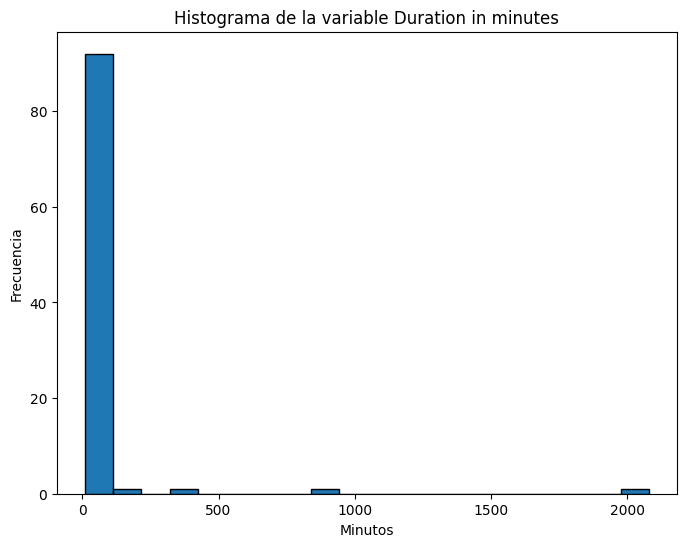

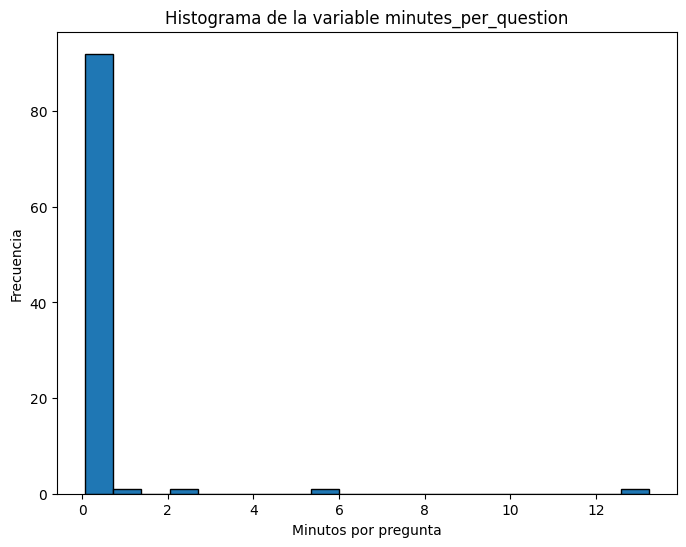

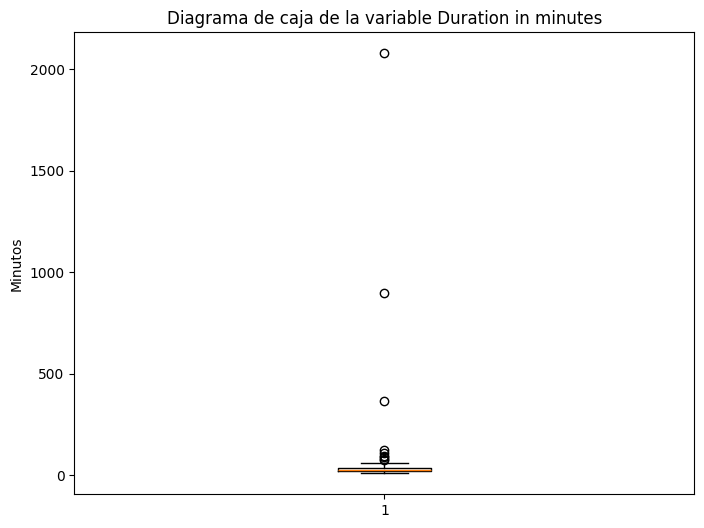

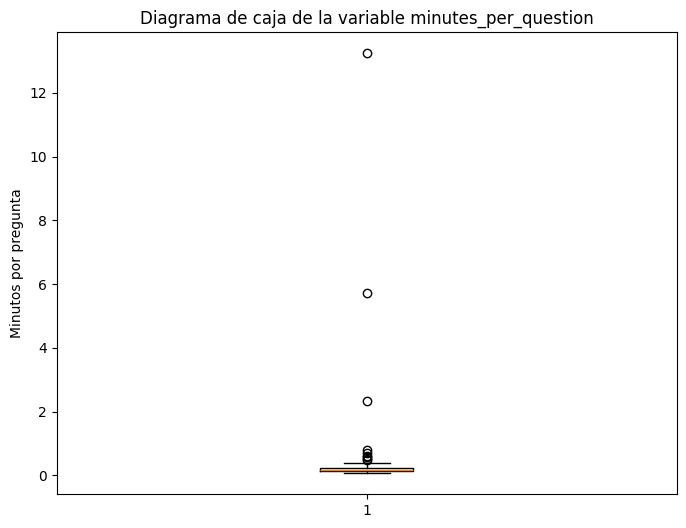

In [72]:
import matplotlib.pyplot as plt

# Histograma para la variable 'Duration in minutes'
plt.figure(figsize=(8, 6))
plt.hist(cali_df['Duration in minutes'], bins=20, edgecolor='black')
plt.title('Histograma de la variable Duration in minutes')
plt.xlabel('Minutos')
plt.ylabel('Frecuencia')
plt.show()

# Histograma para la variable 'minutes_per_question'
plt.figure(figsize=(8, 6))
plt.hist(cali_df['minutes_per_question'], bins=20, edgecolor='black')
plt.title('Histograma de la variable minutes_per_question')
plt.xlabel('Minutos por pregunta')
plt.ylabel('Frecuencia')
plt.show()

# Diagrama de caja para la variable 'Duration in minutes'
plt.figure(figsize=(8, 6))
plt.boxplot(cali_df['Duration in minutes'])
plt.title('Diagrama de caja de la variable Duration in minutes')
plt.ylabel('Minutos')
plt.show()

# Diagrama de caja para la variable 'minutes_per_question'
plt.figure(figsize=(8, 6))
plt.boxplot(cali_df['minutes_per_question'])
plt.title('Diagrama de caja de la variable minutes_per_question')
plt.ylabel('Minutos por pregunta')
plt.show()

In [73]:
max_duration = cali_df['Duration in minutes'].max()
print(max_duration)

2078.3166666666666


In [74]:
import plotly.graph_objs as go

def create_hist_chart(df, column, file_name, output_folder):
    """
    Crea un histograma interactivo utilizando Plotly para una columna específica de un DataFrame.
    
    Args:
        df (pandas.DataFrame): DataFrame que contiene los datos.
        column (str): Nombre de la columna para crear el histograma.
        file_name (str): Nombre del archivo HTML de salida.
        output_folder (str): Ruta de la carpeta de salida donde se guardará el archivo HTML.
    """
    fig = go.Figure(data=[go.Histogram(x=df[column])])
    fig.update_layout(
        title=f'Histograma de la variable {column}',
        xaxis_title=column.split('_')[0],
        yaxis_title='Frecuencia'
    )
    fig.write_html(output_folder.joinpath('hist_chart_' + file_name + '.html'))

def create_box_chart(df, column, file_name, output_folder):
    """
    Crea un diagrama de caja interactivo utilizando Plotly para una columna específica de un DataFrame.
    
    Args:
        df (pandas.DataFrame): DataFrame que contiene los datos.
        column (str): Nombre de la columna para crear el diagrama de caja.
        file_name (str): Nombre del archivo HTML de salida.
        output_folder (str): Ruta de la carpeta de salida donde se guardará el archivo HTML.
    """
    fig = go.Figure(data=[go.Box(y=df[column])])
    fig.update_layout(
        title=f'Diagrama de caja de la variable {column}',
        yaxis_title=column.split('_')[0]
    )
    fig.write_html(output_folder.joinpath('box_chart_' + file_name + '.html'))

In [75]:

create_hist_chart(cali_df, 'Duration in minutes', 'duration_minutes', output_folders[1])
create_hist_chart(cali_df, 'minutes_per_question', 'minutes_per_question', output_folders[1])
create_box_chart(cali_df, 'Duration in minutes', 'duration_minutes', output_folders[1])
create_box_chart(cali_df, 'minutes_per_question', 'minutes_per_question', output_folders[1])

## Numerical Feautures

In [76]:
numerical_features = cali_df.select_dtypes(include=['int64', 'float64']).columns
numerical_features = numerical_features.drop(['Duration in minutes', 'minutes_per_question'])
print(numerical_features)

Index(['Age', 'NormSoc_1', 'NormSoc_2', 'NormSoc_3', 'NormSoc_4', 'NormSoc_5',
       'Deshum_1', 'Deshum_2', 'Deshum_3'],
      dtype='object')


In [77]:
for col in numerical_features:
    #imputation with the mode
    mode = cali_df[col].mode()[0] # get the mode of the column
    cali_df[col] = cali_df[col].fillna(mode)

In [78]:
cali_df.to_csv(data_folders[1].joinpath('cali.csv'))
cali_df.to_excel(data_folders[1].joinpath('cali.xlsx'))
cali_df.to_parquet(data_folders[0].joinpath('cali.parquet'))

In [79]:
cali_df.shape

(96, 107)

In [80]:
def create_map(df,width_df,height_df):
    m = folium.Map(location=[df['Longitud'].mean(),df['Latitud'].mean()], zoom_start=16, projection="mercator")

    for i in range(len(df)):
        # Create a marker with the latitude and longitude of the observation
        marker = folium.Marker([df.iloc[i, -2], df.iloc[i, -1]], popup=df.iloc[i, -3])
        # Add the marker to the map
        m.add_child(marker)
    # m.save(output_folders[1].joinpath('cali_map' + '.html'))
    st_data = st_folium(m, width=width_df, height=height_df)